# Математические пакеты.

## Лабораторная работы 2.
Выполнил студент группы 9381 Николаев Александр

### Цель работы.
Практическое применение дискретного преобразования Фурье c использованием библиотек Python для анализа речевых сигналов.

### Задачи лабораторной работы.

1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса
3. Построить сонограмму по записи своего голоса.

## Выполнение работы.

### Запись и загрузка голоса.

In [157]:
from scipy.io import  wavfile
from scipy import signal
import matplotlib.pyplot as plt
import scipy.io
import numpy

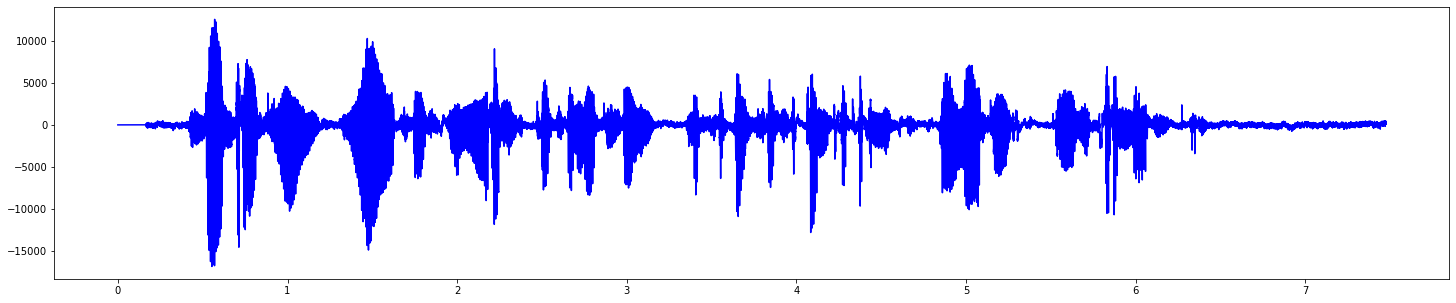

In [140]:
framerate, data = wavfile.read('greeting.wav')

distributionData = numpy.linspace(0, len(data) / framerate, num=len(data))
plt.figure(figsize=(25, 5))
plt.plot(distributionData, data, color='blue')
plt.show()

### Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.

In [141]:
import more_itertools

N = 1024
Sr = round(framerate / N)
offset = int(0.25 * N)

intervals = list(more_itertools.windowed(data, n=N, step=offset))
intervals[len(intervals)-1]=[interval for interval in intervals[len(intervals) - 1] if interval != None]
intervals = [interval * numpy.hamming(len(interval)) for interval in intervals]

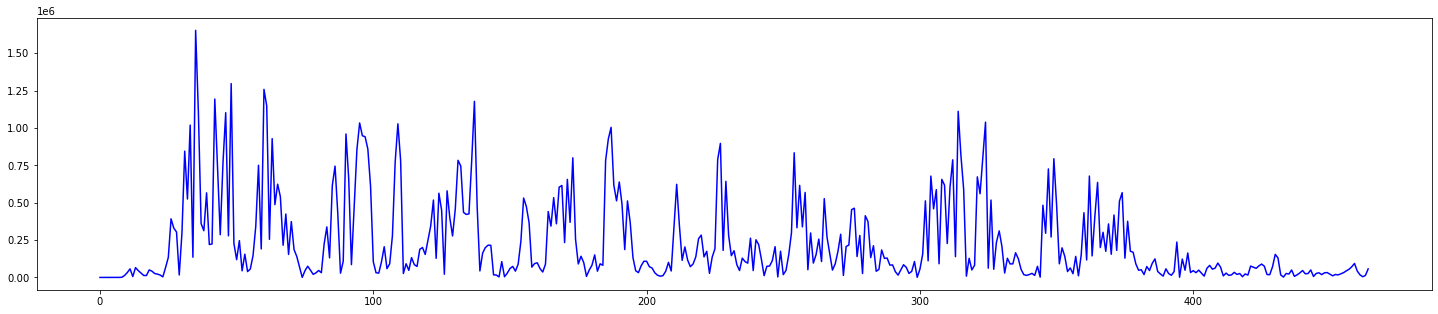

In [142]:
from scipy.fft import fft

intervals = [fft(interval) for interval in intervals]
spectrum = [sum([segment**2 for segment in interval[:int(len(interval) / 2)]])**0.5 for interval in intervals]
spectrum = numpy.array([interval.real for interval in spectrum])

plt.figure(figsize=(25, 5))
plt.plot(spectrum, color='blue')
plt.show()

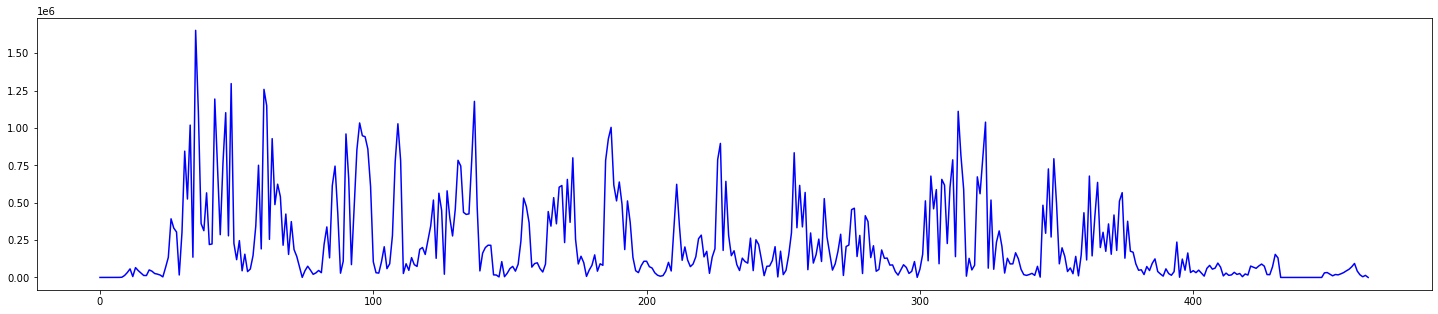

In [143]:
F0 = []
for index in range(0, len(spectrum), Sr):
    interval = numpy.array(spectrum[index : index + Sr])
    if interval.max() > interval.mean() * 2:
        F0 += interval.tolist()
    else:
        F0 += numpy.zeros(len(interval)).tolist()

plt.figure(figsize=(25, 5))
plt.plot(F0, color='blue')
plt.show()

### Используя ДПФ построить траекторию основного тона (F1, F2, F3) на записи своего голоса.

In [144]:
def calcFormant(F0, factor):
    formant = []
    for index in range(0, len(F0)):
        if factor * index - 1 in range(len(F0)) and factor * index + 1 in range(len(F0)):
            maximum = max(F0[factor * index - 1], F0[factor * index + 1])
            if F0[index] > maximum * (factor * 2 + 1):
                formant.append(maximum)
            else:
                formant.append(0) 
    return formant

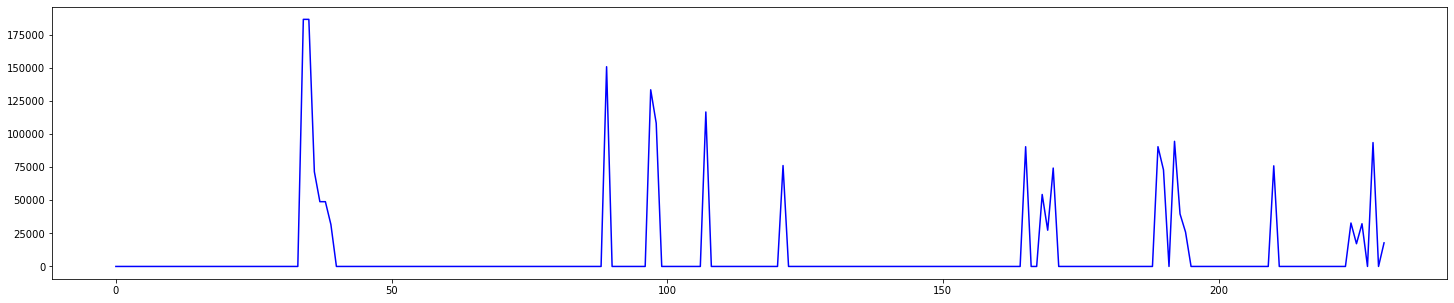

In [145]:
plt.figure(figsize=(25, 5))
plt.plot(calcFormant(F0, 2), color='blue')
plt.show()

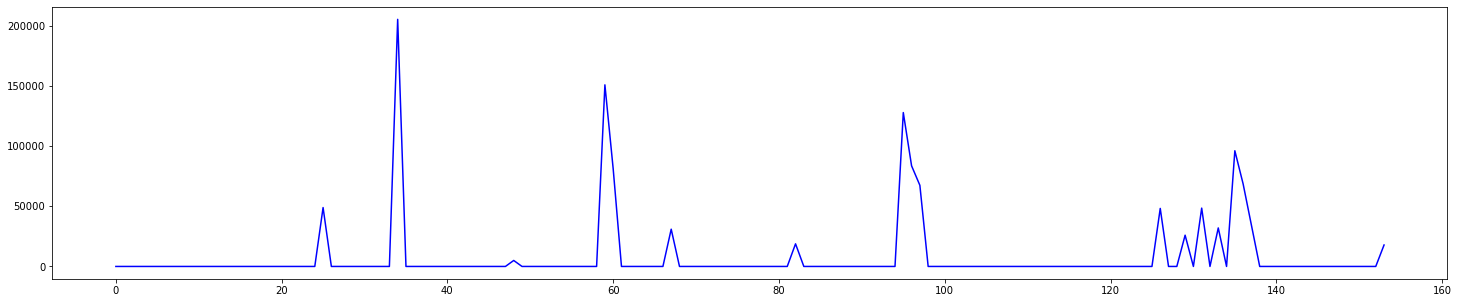

In [146]:
plt.figure(figsize=(25, 5))
plt.plot(calcFormant(F0, 3), color='blue')
plt.show()

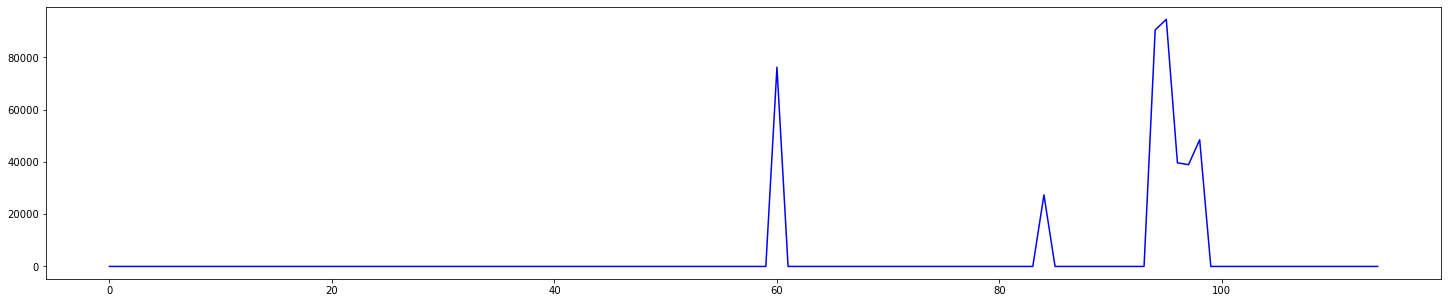

In [147]:
plt.figure(figsize=(25, 5))
plt.plot(calcFormant(F0, 4), color='blue')
plt.show()

### Построить сонограмму записи своего голоса.

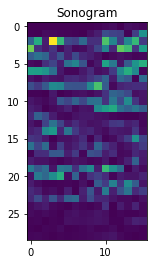

In [156]:
sonogram = [list(spectrum[index : index + Sr]) for index in range(0, len(spectrum), Sr)]

sonogram = sonogram[:-1]
sonogram = np.array(sonogram)
sonogram.reshape(len(sonogram), len(sonogram[0]))

plt.title('Sonogram')
plt.imshow(sonogram)
plt.show()

### Вывод
Была построена траектория основного тона, вторая, третья и четвертая форманты и сонограмма своего голоса.